# t-sne 觀察 : 流形還原

# [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果

# [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 (In[4], Out[4])
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [46]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

0
1
2
3
4


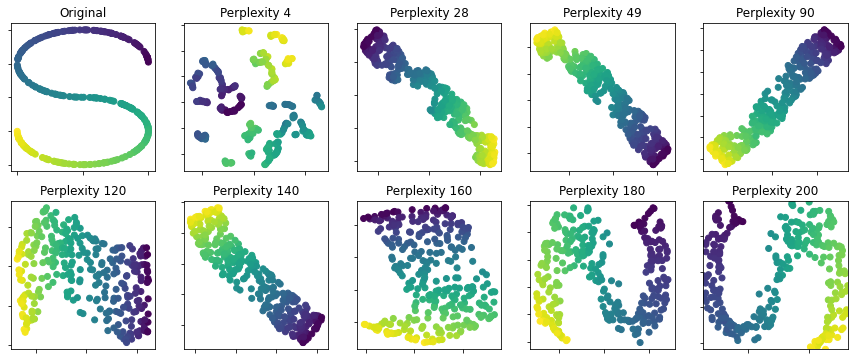

In [81]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 28,49,90,120,140,160,180,200]

# 設定S曲線資料點
X, color = datasets.make_s_curve(n_samples, random_state=0)

# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# 繪製不同 perplexity 下的 t-SNE 流形還原圖 (請注意! 語法也要對應調整)
for index,perplexity in enumerate(perplexities):
    if index < 4:
        ax = subplots[0][index + 1]
    else:
        print(index - len(subplots[0]) + 1)
        ax = subplots[1][index - len(subplots[0]) + 1]
    ax.set_title('Perplexity %d' % perplexity)
    X_tsne = manifold.TSNE(n_components = n_components,perplexity = perplexity,
                           init = 'random',random_state = 1)
    decomposite_X = X_tsne.fit_transform(X)
    
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.scatter(decomposite_X[:,0],decomposite_X[:,1],c = color)

    if index== 8:
        ax.set_xlim(np.min(decomposite_X[:,0]),np.max(decomposite_X[:,0]))
        ax.set_ylim(np.min(decomposite_X[:,1]),np.max(decomposite_X[:,1]))

In [60]:
plt.show()

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果